In [69]:
##### q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1
##005,010,020,030,040,060,080,100,120,140,160
#q0.5_fg0.3_allrx10_sunruns/hires_kin
##170,180,185,190,195,205,210,220,225,230,240,250,260

#m0.5_fg0.3_allrx10_isolated_sunruns
##005,200
#m1_fg0.3_allrx10_isolated_sunruns
##005,100,200

viewpt_list=[5]
import pyfits
import matplotlib.pyplot as plt
import numpy as np
from numpy import shape
from scipy import ndimage
import scipy.ndimage.filters as filters
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
from scipy.ndimage import iterate_structure
from scipy.ndimage.filters import maximum_filter
import matplotlib
import scipy.optimize as opt
from astropy.cosmology import WMAP9 as cosmo
import os
from astropy.convolution import convolve, convolve_fft
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve



img_list=['m1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_030.fits',
          'm1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_060.fits',
          'm1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_100.fits',
          'm1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_200.fits',
          'q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits',
          'q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_060.fits',
          'q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_150.fits',
          'q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_210.fits',
          'q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_240.fits',
          'q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_270.fits',
          'q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_300.fits',
          'q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_320.fits',
          'q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_340.fits',
          'q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_360.fits',
          'q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_400.fits',
         'q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_420.fits']
myr=[30,60,100,200,5,60,150,210,240,270,300,320,340,360,400,420]
merger=[0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1]
merger_sim=['fg3_m_15_iso_1','fg3_m_15_iso_1','fg3_m_15_iso_1','fg3_m_15_iso_1',
        'fg3_m_15','fg3_m_15','fg3_m_15','fg3_m_15',
            'fg3_m_15','fg3_m_15','fg3_m_15','fg3_m_15',
            'fg3_m_15','fg3_m_15','fg3_m_15','fg3_m_15']


img_list=['q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_180.fits',
          'q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_185.fits','q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_190.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_195.fits','q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_205.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_210.fits','q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_220.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_225.fits','q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_230.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_240.fits','q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_250.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_260.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_010.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_020.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_030.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_040.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_060.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_080.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_100.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_120.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_140.fits',
         'q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_160.fits',
         'isolated_galaxies/m0.5_fg0.3/broadband_005.fits','isolated_galaxies/m0.5_fg0.3/broadband_010.fits','isolated_galaxies/m0.5_fg0.3/broadband_030.fits','isolated_galaxies/m0.5_fg0.3/broadband_050.fits',
         'isolated_galaxies/m1_fg0.3/broadband_005.fits','isolated_galaxies/m1_fg0.3/broadband_010.fits','isolated_galaxies/m1_fg0.3/broadband_020.fits','isolated_galaxies/m1_fg0.3/broadband_030.fits','isolated_galaxies/m1_fg0.3/broadband_040.fits','isolated_galaxies/m1_fg0.3/broadband_050.fits','isolated_galaxies/m1_fg0.3/broadband_060.fits','isolated_galaxies/m1_fg0.3/broadband_100.fits']
myr=[180,185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260,
     5,10,20,30,40,60,80,100,120,140,160,
    5,10,30,50,
    5,10,20,30,40,50,60,100]
merger=[1,1,1,1,1,1,1,1,1,1,1,1,
       1,1,1,1,1,1,1,1,1,1,1,
       0,0,0,0,
       0,0,0,0,0,0,0,0]
merger_sim=['fg3_m12','fg3_m12','fg3_m12',
           'fg3_m12','fg3_m12','fg3_m12','fg3_m12',
           'fg3_m12','fg3_m12','fg3_m12','fg3_m12',
            'fg3_m12','fg3_m12','fg3_m12','fg3_m12',
           'fg3_m12','fg3_m12','fg3_m12','fg3_m12',
           'fg3_m12','fg3_m12','fg3_m12','fg3_m12',
           'iso_m0.5_fg0.3','iso_m0.5_fg0.3','iso_m0.5_fg0.3','iso_m0.5_fg0.3',
           'iso_m1_fg0.3','iso_m1_fg0.3','iso_m1_fg0.3','iso_m1_fg0.3','iso_m1_fg0.3','iso_m1_fg0.3','iso_m1_fg0.3','iso_m1_fg0.3']


img_list=['m1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_005.fits',
    'm1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_030.fits',
          'm1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_060.fits',
          'm1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_090.fits',
          'm1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_100.fits',
          'm1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_120.fits',
          'm1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_150.fits',
          'm1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_180.fits',
          'm1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_200.fits',
         'q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits',
         'q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_040.fits',
         'q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_060.fits',
         'q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_100.fits',
         'q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_200.fits',
         'q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_300.fits',
         'q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_400.fits',
          'q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_410.fits',
          'q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_420.fits',
         'q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_600.fits',
         'q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_700.fits',
         'q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_800.fits',
         'q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_900.fits',
         'q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_1000.fits',
         'q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_1100.fits',]
myr=[5,30,60,90,100,120,150,180,200,
     5,40,60,100,200,300,400,410,420,
     600,700,800,900,1000,1100]
merger_sim=['fg3_m_10_iso_1','fg3_m_10_iso_1','fg3_m_10_iso_1','fg3_m_10_iso_1',
       'fg3_m_10_iso_1','fg3_m_10_iso_1','fg3_m_10_iso_1','fg3_m_10_iso_1','fg3_m_10_iso_1',
       'fg3_m_10','fg3_m_10','fg3_m_10','fg3_m_10','fg3_m_10',
        'fg3_m_10','fg3_m_10','fg3_m_10','fg3_m_10',
        'fg3_m_10','fg3_m_10','fg3_m_10','fg3_m_10','fg3_m_10','fg3_m_10']
merger=[0,0,0,0,0,0,0,0,0,
       1,1,1,1,1,1,1,1,1,
       1,1,1,1,1,1]

X=[]
y=[]
for i in range(len(img_list)):
    print(img_list[i])
    for j in range(len(viewpt_list)):
        plott='no'
        viewpt=viewpt_list[j]
        im=pyfits.open(img_list[i])
        
        
        a=produce_camera(myr[i],img_list[i],viewpt)
        
        band=65
        try:
            fill_img=a[1][band]
        except IndexError:
            band=2
        b=determine_coords(a[1][band], plott)#was c, taking the second dimension
        if b[0]==0:
            continue
        
        
        low_pass=b[4]
        num_sol=b[5]

        '''Now, fit a couple 2D gaussians if there are 2 brightest pixels, otherwise
        fit only one 2D gaussian. The output of fit_2_gaussians will be the positions of these
        maxima'''

        if num_sol==1:
            #this is if there's only really one solution because the bulges are too close together
            c=fit_2_gaussian(b[1],shape(a[1][band])[0]-b[0],b[1],shape(a[1][band])[0]-b[0],low_pass, plott)
            if c[8]=='no':
                 c=fit_2_gaussian(b[2],shape(a[1][band])[0]-b[0],b[3],shape(a[1][band])[0]-b[1],low_pass, plott)#was d[3],300-d[2],d[1],300-d[0]

        else:
            c=fit_2_gaussian(b[2],shape(a[1][band])[0]-b[0],b[3],shape(a[1][band])[0]-b[1],low_pass, plott)#was d[3],300-d[2],d[1],300-d[0]

        
        if c[8] == 'no':
            print('Did not fit the 2D Gaussian well')
        if c[4] > c[5]:
            '''this means point 1 is brighter'''
            in_x = c[1]
            in_y = c[0]
            in_2_x = c[3]
            in_2_y = c[2]
            

        if c[5] > c[4]:
            '''point 2 is the brighter source'''
            in_x = c[3]
            in_y = c[2]
            in_2_x = c[1]
            in_2_y = c[0]

            
        
        
        '''Now place a aperture over each center and figure out which is brighter overall'''
        c_final=determine_brighter(a[1][band],  in_y,shape(a[1][band])[0]-in_x,  in_2_y, shape(a[1][band])[0]-in_2_x, a[0])
        
        if c_final[2]=='yes':
            continue

        if c_final[0] > c_final[1]:
            d=clip_image(a[1][band], a[0], 0.03, int(shape(a[1][band])[0]-in_x), int(in_y))
            #this means the first aperture (center) is indeed brighter
        else:
            d=clip_image(a[1][band], a[0], 0.03, int(shape(a[1][band])[0]-in_2_x), int(in_2_y))

        if d[3]=='no':
            #this means the cutout dis outside the image --> bad
            continue
        
        
        e=nanomags(0.03, a[0], d[0],viewpt, myr[i])#was a[1]
        
        texp=1
        prep=convolve_image(myr[i],e[0],e[1],e[2],0.03,a[0],viewpt, e[3], e[4], e[5], e[6], texp)
        
        X.append(prep[3]/np.max(prep[3]))
        y.append(merger[i])
        
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(111)
        
        im1=ax1.imshow(abs(prep[0]),norm=matplotlib.colors.LogNorm(vmin=10**(-1), vmax=10**1),cmap='afmhot')
        #print(mask_log_image)
        #vmin=d[0].min(),vmax=max_img,
        
        ax1.axis('off')
        
        #ax1.annotate(r't = '+str(myr[i]/100)+' Gyr', xy=(0.5,0.9), color='white', xycoords='axes fraction', size=15)
        plt.savefig('../MaNGA_Papers/Paper_I/SDSS_image_plot_contrast_'+str(myr[i])+'_'+str(viewpt)+'_'+str(merger_sim[i])+'.png',bbox_inches='tight')
        
        
        #plt.imshow(prep[3]/np.max(prep[3]))
        #plt.colorbar()
        #plt.show()
        
        

m1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_005.fits


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:316: RuntimeWarning: divide by zero encountered in log10


m1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_030.fits


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


m1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_060.fits
m1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_090.fits
m1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_100.fits
m1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_120.fits
m1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_150.fits
m1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_180.fits
m1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_200.fits
q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits
q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_040.fits
q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_060.fits
q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_100.fits
q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_200.fits
q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_300.fits
q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_400.fits
q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_410.fits
q0.

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in double_scalars
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in double_scalars
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in double_scalars
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in double_scalars
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars
/Users/beckyn

Outside of the box
q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_800.fits
q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_900.fits
q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_1000.fits
q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_1100.fits


[]


In [70]:
def twoD_two_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset,
                     amplitude_2, xo_2, yo_2, sigma_x_2, sigma_y_2, theta_2):
    (x, y) = xdata_tuple 
    xo = float(xo)
    yo = float(yo)   
    xo_2 = float(xo_2)
    yo_2 = float(yo_2)  
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    
    a_2 = (np.cos(theta_2)**2)/(2*sigma_x_2**2) + (np.sin(theta_2)**2)/(2*sigma_y_2**2)
    b_2 = -(np.sin(2*theta_2))/(4*sigma_x_2**2) + (np.sin(2*theta_2))/(4*sigma_y_2**2)
    c_2 = (np.sin(theta_2)**2)/(2*sigma_x_2**2) + (np.cos(theta_2)**2)/(2*sigma_y_2**2)
    
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))+ amplitude_2*np.exp( - (a_2*((x-xo_2)**2) + 2*b_2*(x-xo_2)*(y-yo_2) 
                            + c_2*((y-yo_2)**2)))
    
    return g.ravel()

def detect_peaks(image):
    """
    Takes an image and detect the peaks using the local maximum filter.
    Returns a boolean mask of the peaks (i.e. 1 when
    the pixel's value is the neighborhood maximum, 0 otherwise)
    """

    # define an 8-connected neighborhood
    struct = generate_binary_structure(2,1)
    
    neighborhood = iterate_structure(struct, 10).astype(bool)
    
    #apply the local maximum filter; all pixel of maximal value 
    #in their neighborhood are set to 1
    local_max = maximum_filter(image, footprint=neighborhood)==image
    #local_max is a mask that contains the peaks we are 
    #looking for, but also the background.
    #In order to isolate the peaks we must remove the background from the mask.
    
    
    #we create the mask of the background
    background = (image==0)

    #a little technicality: we must erode the background in order to 
    #successfully subtract it form local_max, otherwise a line will 
    #appear along the background border (artifact of the local maximum filter)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)

    #we obtain the final mask, containing only peaks, 
    #by removing the background from the local_max mask (xor operation)
    detected_peaks = local_max ^ eroded_background

    return detected_peaks


    
    

def produce_camera(myr,img, viewpoint):
    im=pyfits.open(img)

    plt.clf()
    

    camera_data=im['CAMERA'+str(viewpoint)+'-BROADBAND'].data
    pixelscale =  im['CAMERA'+str(viewpoint)+'-BROADBAND'].header['CD1_1']

    

    xs = np.linspace(0,shape(camera_data[0])[0]-1,shape(camera_data[0])[0])
    xs_kpc = [pixelscale*x for x in xs]

    
    
    return pixelscale, camera_data
def determine_coords(img, plot):
    
    
    kernel = np.ones((10,10))

    lp_3 = ndimage.convolve(img, kernel)#was result
    if plot=='yes':
        plt.imshow(img)
        plt.title('before filtering')
        plt.colorbar()
        plt.show()
    
    '''Okay here is where you can filter out low stuff'''
    
    max_value=(lp_3.max())
    low = np.where(lp_3 < 0.2*max_value)
    
   
    lp_3[low] = 0
    
 
    
    
    kernel_high = -1*np.ones((3,3))
    kernel_high[1,1]=8
    
    hp_lp = ndimage.convolve(lp_3, kernel_high)
    
    
    '''sharpen'''

    kernel_sharpen = np.zeros((3,3))
    kernel_sharpen[0,1]=-1
    kernel_sharpen[1,0]=-1
    kernel_sharpen[1,1]=5
    kernel_sharpen[1,2]=-1
    kernel_sharpen[2,1]=-1
    kernel_sharpen=kernel_sharpen
    
    hp_lp_sharp = ndimage.convolve(hp_lp, kernel_sharpen)
    if plot=='yes':
        pp.imshow(hp_lp_sharp)
        pp.title('Sharpened')
        pp.colorbar()
        pp.show()
    
    data_max = filters.maximum_filter(hp_lp, 3)
    #data_max = filters.maximum_filter(data, neighborhood_size)
    maxima = (hp_lp == data_max)
    data_min = filters.minimum_filter(lp_3, 10)
    diff = ((data_max - data_min) > 100)
    maxima[diff == 0] = 0
    
    
    
    
    
    indices = np.where(detect_peaks(lp_3) == 1)#was hp_lp_sharp
    #number_of_sols=len(indices[0])
    number_of_sols=len(indices[0])
    
    
    try:
        return indices[0][0],indices[0][-1],indices[1][0],indices[1][-1], lp_3, number_of_sols
    except IndexError:
        return 0,0,0,0,lp_3,number_of_sols
def fit_2_gaussian(x_1,y_1,x_2,y_2, data, plot):
# Create x and y indices
    data=np.flipud(data)
    x = np.linspace(0, 299, 300)
    y = np.linspace(0, 299, 300)
    x, y = np.meshgrid(x, y)
    

    # add some noise to the data and try to fit the data generated beforehand
    initial_guess = (20,x_1,y_1,7,7,0,10,20,x_2,y_2,7,7,0)
    data=data.ravel()
    
   
    
    #And plot the results:
    
    data_here = twoD_two_Gaussian((x,y), *initial_guess)
    if plot=='yes':
        fig, ax = plt.subplots(1, 1)
        ax.hold(True)
        ax.imshow(data.reshape(300, 300), cmap=plt.cm.jet, origin='bottom',
            extent=(x.min(), x.max(), y.min(), y.max()))
        ax.contour(x, y, data_here.reshape(300, 300), 8, colors='w')
        plt.show()
    try:
        popt, pcov = opt.curve_fit(twoD_two_Gaussian, (x, y), data, p0=initial_guess)
        fit='yes'
    except RuntimeError:
        popt=[0,0,0,0,0,0,0,0,0,0,0,0,0]
        fit='no'
    data_fitted = twoD_two_Gaussian((x, y), *popt)
    
 
    if plot=='yes':
        fig, ax = plt.subplots(1, 1)
        ax.hold(True)
        ax.imshow(data.reshape(300, 300), cmap=plt.cm.jet, origin='bottom',
            extent=(x.min(), x.max(), y.min(), y.max()))
        ax.contour(x, y, data_fitted.reshape(300, 300), 8, colors='w')
        plt.show()
    
    return popt[1], popt[2], popt[8], popt[9], popt[0], popt[7], np.sqrt(popt[3]**2+popt[4]**2), np.sqrt(popt[10]**2+popt[11]**2), fit 
def determine_brighter(img, x, y, x2, y2, pix):
    kpc_arcmin=cosmo.kpc_proper_per_arcmin(0.03)#insert the redshift to get the kpc/arcmin scaling

    
    ap_size=(3*(kpc_arcmin.value/60))/pix ###arcsec * kpc/arcsec   / kpc/pix
    from photutils import CircularAperture,aperture_photometry
    '''step 1: define the circular aperture'''
    positions = [(x, y), (x2, y2)]
    apertures = CircularAperture(positions, ap_size)
    phot_table = aperture_photometry(img, apertures)
    total_light_1=phot_table['aperture_sum'][0]
    total_light_2=phot_table['aperture_sum'][1]

    
    masks = apertures.to_mask(method='center')
    mask = masks[0]

    image = mask.to_image(shape=((shape(img)[0], shape(img)[0])))
    skip='no'
    try:
        data_cutout = mask.apply(img)
        
    except TypeError:
        skip='yes'

    '''plt.imshow(data_cutout, norm=matplotlib.colors.LogNorm())
    plt.show()


    
    
    
    plt.imshow(img, norm=matplotlib.colors.LogNorm())
    plt.scatter(x,y, color='white')
    plt.scatter(x2,y2, color='red')
    plt.show()'''
    return total_light_1, total_light_2, skip

def clip_image(ins, pixelscale, redshift, xcen, ycen):
    plt.clf()
    '''I count 50" to a side images'''
    #print('pixelscale', pixelscale)
    kpc_arcmin=cosmo.kpc_proper_per_arcmin(redshift)#insert the redshift  
    #print(kpc_arcmin.value/60, 'kpc per arcsec')
    '''Divide the pixelscale (kpc) by kpc/arcsec to get arcsec
    size of pixels'''
    size_a=pixelscale/(kpc_arcmin.value/60)
    #print('size', size_a, 'arcsec pixels')
    num_pix_half=int(25/size_a)
    if xcen-num_pix_half < 0 or ycen-num_pix_half < 0 or xcen+num_pix_half > 300 or ycen+num_pix_half > 300:
        print('Outside of the box')
        clipped=0
        tag='no'
    
    else:
        clipped=(ins[xcen-num_pix_half:xcen+num_pix_half,ycen-num_pix_half:ycen+num_pix_half])
        tag='yes'
    
    return clipped, size_a, num_pix_half, tag, xcen, ycen
'''Now I have to convert the units of LAURAS sims into nanomaggies and AB mags (mags of DR7 and DR13)
'''
def nanomags(z, pixscale, camera_data, view, number):
#first, go from specific intensity (because we have per steradian) to 
#janskies (W/Hz/m^2)
    c = 299792.458*1000#to get into m/s

#this 1.35e-6 comes from the arcsin(R_sky/Distance to object)
#the answer needs to be in radians

#J=10^-26 W/m^2/Hz, so units of flux density
#reference site: http://www.cv.nrao.edu/course/astr534/Brightness.html
#We need to go from a spectral brightness (I_nu) which is in m units
#To a flux density (S_nu) which is in units of Janskies (W/m^2/Hz)

#So you need to multiply the Fν by c / λ^2 to convert it into Fλ. 
#But we are not done yet! Recalling from above, the units of Fλ 
#are not an energy density. You need to get another factor of λ 
#in there to make the units work out to be energy density: 
#calculate λFλ to get units of ergs/s/cm^2.

#1.35e-6 comes from: sin^-1(pixelscale=0.166666#kpc/pix/ comoving distance in kpc)
    pixelscale=pixscale#0.166666#kpc/pix/
    d_a = cosmo.angular_diameter_distance(z).value#, **fidcosmo)
    d_co = cosmo.comoving_distance(z).value
    d_lum = cosmo.luminosity_distance(z).value 
    #print("Angluar-diameter distance to z=0.03 is", 1000*(d_a), 'kpc')
    #print("Comoving distance to z=0.03 is", 1000*((d_co)), 'kpc')
    #print("Luminosity distance to z=0.03 is", 1000*((d_lum)), 'kpc')



    #here's a good review of all the different distances
    #http://www.astro.ufl.edu/~guzman/ast7939/projects/project01.html

    #masked=ma.masked_where(camera_data[2] <= 0, camera_data[2])
    Janskies=np.array(10**(26)*camera_data*(pixelscale/(1000*d_lum))**2*np.pi*((6185.2*10**(-10))**2/c), dtype='>f4')
    #A Jansky is 10−26 watts per square metre per hertz.



    nanomaggy=Janskies/(3.631*10**(-6))

    

    #first, convert to counts
    #dn=img/cimg+simg
    cimg=0.005005225 #nanomaggies/count
    gain=4.735
    darkvar=1.1966
    simg=121.19590411
    counts=(nanomaggy)/cimg+simg
    sigma_counts=np.sqrt(counts/gain+darkvar)
    sigma_nanomags=sigma_counts*cimg
    
    nanomag_bg = counts*cimg



    '''The sky resids are given by:''' 
    sky_resids_mine=cimg*np.random.normal(0.331132,5.63218,shape(nanomaggy))
    sky_resids_mine_counts=np.random.normal(0.331132,5.63218,shape(nanomaggy))
    d_image=(nanomaggy)+sky_resids_mine
    degraded_image=d_image
    degraded_image_counts=d_image/cimg
    #degraded_image=ma.masked_where(d_image <= 0, d_image)#numpy.ma.masked_less(x, value, 

    #in nanomags
    #poisson_plus = np.sqrt((np.flipud(nanomaggy)+ 0.004701377)/1367.29546)+sky_resids_mine
    #poisson_plus_nanomags = poisson_plus*1367.29546
    
  
    mag=22.5-2.5*np.log10(nanomaggy)

    
    #return n, sky resids added (nanomags), poisson noise, resids in nanomags, sky resids added (counts), poisson noise, resids in counts
    return nanomaggy, degraded_image, sigma_nanomags, sky_resids_mine, degraded_image_counts, sigma_counts, sky_resids_mine_counts
#was degraded image, sigma_nanomags

def convolve_image(number,nanomaggy,degraded_image,sigma_nanomags,z,pixscale, view, background, counts, counts_sig, background_counts, t_exp):#all of these are in nanomags
    #PSF = 1.61 arcsec
    

    

    kpc_arcmin=cosmo.kpc_proper_per_arcmin(z)#insert the redshift to get the kpc/arcmin scaling

    sigma=1.61/2.355#apparently the preimage sigma is not large :)
    ##kpc/pix is the pixelscale
    ##conversion factor is kpc/"
    #1.61 is the FWHM in arcsec of the psf
    #pixelscale is kpc/pix
    kernel_sigma_pix=(sigma*(kpc_arcmin.value/60))/pixscale
  

    gaussian_2D_kernel = Gaussian2DKernel(kernel_sigma_pix)#standard deviation in pixels



    #result = convolve(np.sum(CAMERA0.data[:,:,:],axis=0), gaussian_2D_kernel)
    result_nano = (convolve(nanomaggy, gaussian_2D_kernel))
    result = (convolve(degraded_image, gaussian_2D_kernel))
    result_bg = (convolve(background, gaussian_2D_kernel))
    result_bg_counts = (convolve(background_counts, gaussian_2D_kernel))
    result_error = (convolve(sigma_nanomags, gaussian_2D_kernel))
    
    result_counts = (convolve(counts, gaussian_2D_kernel))
    result_error_counts = (convolve(counts_sig, gaussian_2D_kernel))

   
    
    
    
   
    #def convolve_image(number,nanomaggy,degraded_image,sigma_nanomags,z,pixscale, view, background, counts, counts_sig, background_counts, t_exp):#all of these are in nanomags
    #return degraded image, bg, nanomaggy
    return result, result_bg, result_nano, result_counts, result_error_counts, result_bg_counts
    

print('Compiled')

Compiled


In [71]:
from sklearn.model_selection import train_test_split
print(type(X), type(y))
print(np.shape(X))
print(np.shape(y))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
print(type(X_train), type(y_train))
print(np.shape(X_train))
print(np.shape(y_train))

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train.reshape(X_train.shape[0],  X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0],   X_test.shape[1], X_test.shape[2], 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print('shape bf',np.shape(y_train))
print(y_train)

y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)
print('shape af',y_train.shape)
print(y_train)

print(X_train.shape)#print(y_train)


<class 'list'> <class 'list'>
(22, 182, 182)
(22,)
<class 'list'> <class 'list'>
(17, 182, 182)
(17,)
shape bf (17,)
[1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1]
shape af (17, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
(17, 182, 182, 1)


In [72]:
model = Sequential()
 
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=( X_train.shape[1], X_train.shape[2], 1), data_format='channels_last'))
print(model.output_shape)


model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
 


(None, 180, 180, 32)


In [73]:
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
 
# 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)

/Users/beckynevin/anaconda/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
17/17 [==============================] - 3s 171ms/step - loss: 0.6955 - acc: 0.4118
Epoch 2/10
17/17 [==============================] - 2s 89ms/step - loss: 0.5233 - acc: 0.7059
Epoch 3/10
17/17 [==============================] - 2s 89ms/step - loss: 0.4090 - acc: 0.7647
Epoch 4/10
17/17 [==============================] - 1s 81ms/step - loss: 0.7926 - acc: 0.6471
Epoch 5/10
17/17 [==============================] - 1s 76ms/step - loss: 0.2459 - acc: 0.9412
Epoch 6/10
17/17 [==============================] - 1s 74ms/step - loss: 0.2100 - acc: 0.8824
Epoch 7/10
17/17 [==============================] - 1s 77ms/step - loss: 0.0964 - acc: 1.0000
Epoch 8/10
17/17 [==============================] - 1s 79ms/step - loss: 0.0412 - acc: 1.0000
Epoch 9/10
17/17 [==============================] - 1s 76ms/step - loss: 0.0674 - acc: 1.0000
Epoch 10/10
5/5 [==============================] - 0s 46ms/step


In [76]:
print(score, 'loss','accuracy')
model_path='path'
model.save(model_path)
print('Saved trained model at %s ' % model_path)
plt.clf()
fig, axs = plt.subplots(2,3, figsize=(9, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.1)

axs = axs.ravel()
for j in range(len(X_test)):
    print(model.predict(X_test)[j])
    print(shape(X_test[j].reshape(X_test[j].shape[0],X_test[j].shape[1])))
    print(len(X_test))
    axs[j].imshow(abs(X_test[j].reshape(X_test[j].shape[0],X_test[j].shape[1])),norm=matplotlib.colors.LogNorm(vmin=0.01))#norm=matplotlib.colors.LogNorm(vmax=0.8))
    #axs[j].annotate('Prediction [Nonmerging Merging]', color='white', xy=((0.1,0.95)), xycoords='axes fraction')
    
    #axs[j].annotate('                 ['+str(round(model.predict(X_test)[j][0],6))+' '+str(round(model.predict(X_test)[j][1],6))+']', color='white', xy=((0.1,0.9)), xycoords='axes fraction')
    axs[j].annotate('['+str(round(model.predict(X_test)[j][0],6))+' '+str(round(model.predict(X_test)[j][1],6))+']', color='white', xy=((0.1,0.9)), xycoords='axes fraction')
    
    axs[j].annotate(str(y_test[j]), color='white', xy=((0.1,0.8)), xycoords='axes fraction')
    #plt.colorbar()
    axs[j].set_xticks([])
    axs[j].set_yticks([])
    print(y_test[j])
    if j == len(X_test):
        axs[j].set_visible(False)
fig.delaxes(axs[j+1])
plt.savefig('../MaNGA_Papers/Paper_I/keras_CNN_q0.1_fg0.3_BT0.2.pdf')

[0.009745675139129162, 1.0] loss accuracy
Saved trained model at path 


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[0.01044631 0.9895537 ]
(182, 182)
5
[0. 1.]
[2.1732468e-04 9.9978274e-01]
(182, 182)
5
[0. 1.]
[2.570763e-04 9.997429e-01]
(182, 182)
5
[0. 1.]
[2.0246756e-04 9.9979752e-01]
(182, 182)
5
[0. 1.]
[0.96314615 0.03685388]
(182, 182)
5
[1. 0.]


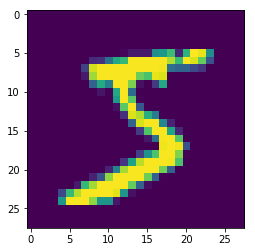

(60000, 1, 28, 28)


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  app.launch_new_instance()


ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_2/convolution' (op: 'Conv2D') with input shapes: [?,1,28,28], [3,3,28,32].

/Users/beckynevin/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

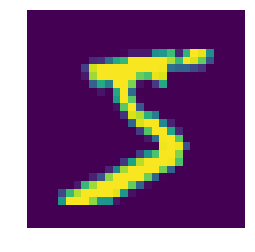

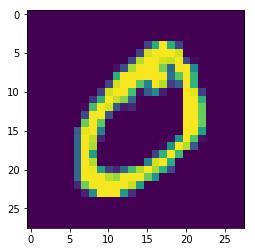

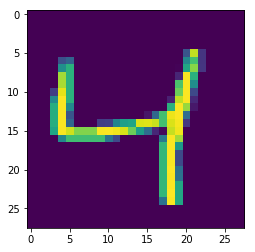

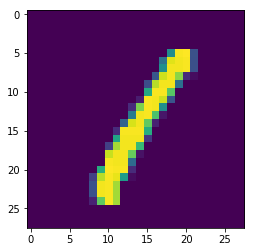

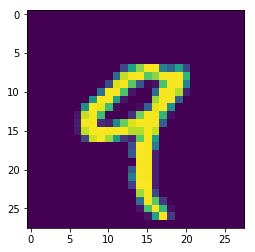

[5 0 4 1 9]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)


NameError: name 'STOP' is not defined

In [6]:
# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
 
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
for j in range(5):
    plt.imshow(X_train[j])
    plt.show()
print(y_train[0:5])
print(type(X_train))
print(type(y_train))
print(np.shape(X_train))
STOP
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0],  28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
# 6. Preprocess class labels
print(np.shape(y_train))
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
 
print(np.shape(Y_train))
    
STOP
# 7. Define model architecture
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
 
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)